# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# You need to mount your google drive  to the /content/gdrive folder of your virtual computer
# located in the colab server

from google.colab import drive
drive.mount("/content/gdrive")
#drive.mount("/content/gdrive", force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.vision import *

## Get a list of URLs

### Search and scroll

Guide lines: (1) notebook 에 나오는 fastai 문장들의 의미는 docs.fast.ai 에 상세히 설명되어 있으므로 참조하면 됨. (2)  클래스나 메소드 이름위에 커서를 놓고 Cntrl+Click 를 하면 노트북 오른쪽에 이에 대한 정의가 나오므로 이를 참조할 수 있다. (3) 답안은 문제 뒤에 notebook 에 직접 작성하고 결과는 숙제 제출하듯이 github에 업로드하면 된다. (4) 본 시험을 수행하는 동안 인터넷에서 다운 받은 이미지 데이타 파일들은 본인의 github에 MidTerm 폴더를 만들어 그안에  답안지 노트북과 함계 업로드한다. 

Question 1: (1.1) 아래 설명을 참조하여 구글에서 이미지 검색을 하여 동물 이미지를 5개의 카테고리를 지정하여 검색하라. 

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

(1.2) 검색된 각 이미지 리스트를 다음의 설명을 참조하여 개인 컴퓨터 다운로드 폴더에 다운로드하고 파일명을 urls_*.csv 형식으로 적절하게 명명하라 (그후 이 파일들은 개인의 구글 드라이브의 적절한 폴더에  upload 한다) 

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In Google Chrome press <kbd>Ctrl</kbd><kbd>+Shift</kbd><kbd>+j</kbd> on Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>j</kbd> on macOS, and a small window the javascript 'Console' will appear. In Firefox press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>k</kbd> on Windows/Linux or <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>k</kbd> on macOS. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### upload urls file into /content folder

(1.3)  다음 그림과 같이 구글 드라이브가 content/gdrive 폴더에 연결되는 것을 확인하고 스크린 캡춰를 해서 답안 노트북에 이미지를 삽입하라. 현재 시험 노트북에서 한 것 처럼 하면 된다. 시험문제에서 보여주는 파일구조와 경로는 예시로 보여준 것이며, 각자는 폴더구조가 다를 것이므로 이를 고려하여 노브툭 코드를 수정해야 한다. 이렇게 연결되면 colab notebook 은 구글 드라이브의 서브 폴더에 있는 *.csv 파일을 읽어 들일수 있다. ![alt text](https://drive.google.com/uc?id=1ObEUZxFDnXiK47lK_Lkg8z0e0Fe1T-QM)

![대체 텍스트](https://user-images.githubusercontent.com/23696493/79542067-f2e18500-80c5-11ea-8046-46585f602f99.PNG)

You will need to run this cell once per each category.

In [0]:
path = Path('drive/My Drive/Colab Notebooks/wolfs')


In [33]:
print (path)

drive/My Drive/Colab Notebooks/wolfs


In [34]:
path.ls()
# Question 2: 위 명령어를 실행하여 무엇이 디스플레이되는지 확인하라. wolfs 폴더밑에 
# 등장하는 폴더 이름들이 이미지 classificaton 문제에서 어떤 역할을 하는지 설명하라. models 폴더를 제외하고.

#[PosixPath('drive/My Drive/Colab Notebooks/wolfs/.ipynb_checkpoints'),
 #PosixPath('drive/My Drive/Colab Notebooks/wolfs/eurasian'),
 #PosixPath('drive/My Drive/Colab Notebooks/wolfs/gray'),
 #PosixPath('drive/My Drive/Colab Notebooks/wolfs/arctic'),
 #PosixPath('drive/My Drive/Colab Notebooks/wolfs/red'),
 #PosixPath('drive/My Drive/Colab Notebooks/wolfs/mexican')]

# 위에 등장하는 폴더 이름들은 이미지 classification 문제에서 분류의 대상이 되는 카테고리를 라벨링하는 역할을 한다.

[PosixPath('drive/My Drive/Colab Notebooks/wolfs/.ipynb_checkpoints'),
 PosixPath('drive/My Drive/Colab Notebooks/wolfs/eurasian'),
 PosixPath('drive/My Drive/Colab Notebooks/wolfs/gray'),
 PosixPath('drive/My Drive/Colab Notebooks/wolfs/arctic'),
 PosixPath('drive/My Drive/Colab Notebooks/wolfs/red'),
 PosixPath('drive/My Drive/Colab Notebooks/wolfs/mexican')]

## Download images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [0]:
classes = ['artic', 'eurasian', 'gray', 'mexican', 'red']

In [31]:
# For example, Do this when download "urls_black.csv' file:
folder = 'eurasian'
dest = path/folder
file = 'urls_eurasian.csv'
download_images(dest/file, dest, max_pics=200)
# Question 3: download_images() 명령을 실행하기 전의 dest 폴더의 내용과 이후의 내용이 
# 어떻게 바뀌는지 기술하라.  폴더 안에 등장하는 이미지 파일들의 갯수는 모두 몇개인가? 
# 이 갯수는 어떻게 결정되는가?

# 기존에 하나의 csv 파일만 존재하다가 80개의 새로운 이미지가 추가되었다.
# 80개
# download_images의 max_pics 파라미터 값에 의해 최대 이미지 개수가 결정된다.

In [0]:
# If you have problems download, try with `max_workers=0` to see exceptions:
#download_images(dest/file, dest, max_pics=20, max_workers=0)
# cf: Having more workers will increase the memory usage and that’s the most serious overhead. 
# I’d just experiment and launch approximately as many as are needed to saturate the training. It depends on the batch size, but I wouldn’t set it to the same number - each worker loads a single batch and returns it only once it’s ready.
#num_workers equal 0 means that it’s the main process that will do the data loading when needed.
# For more information about num_works, refer to https://discuss.pytorch.org/t/guidelines-for-assigning-num-workers-to-dataloader/813


In [35]:
folder = 'arctic'
dest = path/folder
file = 'urls_arctic.csv'
download_images(dest/file, dest, max_pics=200)

In [36]:
folder = 'gray'
dest = path/folder
file = 'urls_gray.csv'
download_images(dest/file, dest, max_pics=200)

In [38]:
folder = 'mexican'
dest = path/folder
file = 'urls_mexican.csv'
download_images(dest/file, dest, max_pics=200)

In [39]:
folder = 'red'
dest = path/folder
file = 'urls_red.csv'
download_images(dest/file, dest, max_pics=200)

Then we can remove any images that can't be opened:

In [42]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

artic
eurasian


gray


mexican


red


## View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
                                                                    
# Question 4: 위 명령어에서 ImageDataBunch 클래스는 경로 path 파일구조안에 저장되어 있는 이미지 데이타를 
# 메모리 안으로 읽어들이는데 사용되는 여러가지 메소드을 정의한다.  from_folder() 메소드는 폴더구조를 
# 활용하여 이미지 분류에 필요한 정보를 읽어들이는 메소드이다. (4.1) 이 메소드의  파라미터들 중 
# train 은 무엇을 가리키는가 (4.2) valid_pct (= validation percentage ) 는 무엇을 가리키는가
# (4.3) ds_tfms 은 어떤 용도로 사용되는가? (4.4) size=224는 무엇을 의미하는가?

# (4,1) : Imagenet 스타일 데이터셋을 생성하기 위한 train 경로를 뜻한다.
# (4,2) : validation set으로 사용할 전체 이미지의 퍼센티지를 가리킨다.
# (4,3) : 이미지에 적용할 변형을 지정하기 위한 용도.
# (4,4) : 타겟 이미지의 크기를 의미한다.


In [0]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [45]:
data
# Question 5: 윗 명령을 실행하여 ImageDataBunch.from_folder() 의 결과가 저장된 data object 를 display 하라.
# display 된 것을 보면 data object 주어진 전체 데이타 집합을 신경망 Train 에 사용하는 데이타와 
# 신경망 검증 (Valid) 에 사용하는 데이타, 그리고 실제 테스트 (Test) 에 사용하는 데이타로 나누는데, 본 노트북은
# 테스트 데이타를 사용하지 않는다. 본 문제를 푸는데 data.classes, data.c, data.train_ds, data.valid_ds 명령어를  실행하여 
#  그 결과를 확인하는 것이 도움이 될 것이다.
# (5.1) (Valid 테이타의 수) / ( Train 데이타 수 + Valid 테이타 수) 를 
#  계산하면 어떤 값이 나오는가? 
# 이 값은 위에서 미리 설정한 어떤 파라미터 값과 동일한데, 그 파라미터가 무엇인지 기술하라.   
#  
# (5.2) data 오브젝트의 내부구조를 파악하는 것은 신경망 학습과정을 이해하는데 매우 중요하다. 이 data 는 사전구조를
# 가지므로 그 내용을 파악하기가 어렵지 않다.  
# (5.2) Train 데이타에서  x 는 이미지 리스트이고 ( = data.train_ds.x)  y 는 카테고리 리스트인데 (=data.train_ds.y),
#  아래 디스프레이된 표의 의미를 기술하라. [train_ds = train_dataset]
#  ( 아래 디스플레이된 것은 예시이며 각자의 노트북은 다를 것이다)
# (5.3) Valid 데이타에서  x 는 이미지 리스트이고  (data.valid_ds.x), y 는 카테고리 리스트인데 (data.valid_ds.y),
#   아래 디스프레이된 표의 의미를 기술하라.

#ImageDataBunch;

# Train: LabelList (320 items)
# x: ImageList
# Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
# y: CategoryList
# eurasian,eurasian,eurasian,eurasian,eurasian
# Path: drive/My Drive/Colab Notebooks/wolfs;

# Valid: LabelList (80 items)
# x: ImageList
# Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
# y: CategoryList
# arctic,red,eurasian,arctic,gray
# Path: drive/My Drive/Colab Notebooks/wolfs;

# Test: None

# (5,1) : (80) / (320 + 80) = 0.2
# (5,2) : 분석 모델을 만들기 위한 학습용 데이터이다.
# (5,3) : 여러 분석 모델 중 어떤 모델이 적합한지 선택하기 위한 검증용 데이터이다.


ImageDataBunch;

Train: LabelList (320 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
eurasian,eurasian,eurasian,eurasian,eurasian
Path: drive/My Drive/Colab Notebooks/wolfs;

Valid: LabelList (80 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
arctic,red,eurasian,arctic,gray
Path: drive/My Drive/Colab Notebooks/wolfs;

Test: None

In [46]:
len(data.valid_ds.y)


     

80

In [47]:
data.classes

['arctic', 'eurasian', 'gray', 'mexican', 'red']

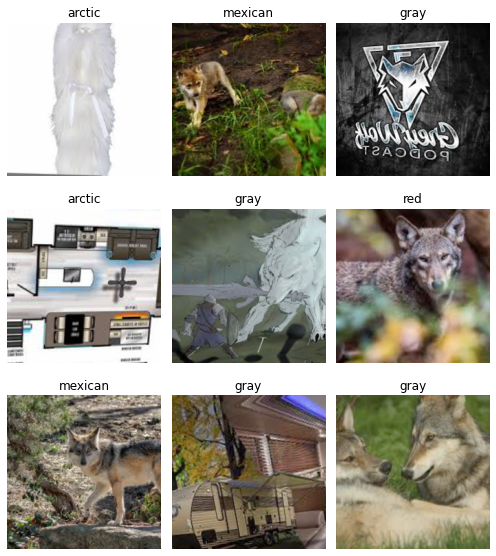

In [48]:
data.show_batch(rows=3, figsize=(7,8))

In [49]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['arctic', 'eurasian', 'gray', 'mexican', 'red'], 5, 320, 80)

## Train model

In [51]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
# Question 6: cnn_learner() 는 cnn 신경망을 학습하는 프로그램을 내장한 object인 learn 을 
# 생산하는 함수이다. 이 learn 오브젝트가 제공하는 학습실행 메소드를 실행하면 신경망의 학습이 완료된다
# cnn_learner 함수의 두번째 파라미터는 resnset34 라고 불리는 이미지 분류를 위해 설계된 신경망 구조 (architecture)
# 이다. resnet34 는 이 신경망 구조를 지칭하는 말로 쓰이기도 하지만, 문맥에 따라서는 주어진 이미지에 대해 
# 37 개의 카테고리에 속할 확률을 계산하기 위해 아주 많은 수의 이미지를 대상으로  이미 학습된 신경망을 가리키기도 한다. 
# 본 노트북의 경우 인터넷에서 검색한 이미지들에 대해서 우리가 설정한 카테고리를 이용하는 신경망을 구축하는 것이 
# 목적인데 위 명령어는 resnet34 이라는 구조를 이용하여 구축한다는 것을 의미한다.  
# (6.1) cnn_learner() 는 위에 표시된 파라미터 이외에도 다른 파라미터가 있는데 그중에 특히 중요한 것이
# pretrained 라는 것인데, 위 명령어에서는 명시적으로 설정되지 않았다. 이 경우 이 파라미터는 default 값을 가지는데
# 이 default값이 True 이다. 이것은 이미 학습된 resnet34 를 이용하라는 뜻이다. 어떻게 이용하는지 그 원리와 근거를 
# 기술하라. (6.2) pretrained = False 로 설정하면 어떤 일이 일어나는가?  본 노트북은 수백개의 이미지를 가지고 신경망을
# 학습하는데, pretrained = False 상태에서 수백개의 이미지를 가지고 신경망을 학습시킬 경우 그 신경망의 성능에 대해서
# 어떤 예측을 할 수 있는가?   

# (6,1) : cnn_learner 메소드는 Learner 객체를 arch에 의해 정의된 대로 모델을 정교화 시키게 된다.
# (6,2) : pretrained가 False일 경우 랜덤하게 초기화 되어 모델을 정교화 시킨다.

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [52]:
learn.fit_one_cycle(4)
# Question 7: (7.1) 위 명령어가 하는 일은 무엇이며, 그 결과로 디스플레이되는 아래 표에서 epoch 는 무엇을 가리키며,
#  각 epoch에 대해서 # 표시되는 train_loss, valid_loss, error_rate 은 무엇을 의미하는지 설명하라. 
# (7.2) epoch가 증가할 수록 train_loss와 valid_loss의 값이 어떻게 변화되는가? 이 변화의 의미는 무엇인가?

# (7,1) : fit_one_cycle()은 1cycle policy를 가지고 모델을 fit시키는 역할을 하게 된다. 한 번의 epoch는 인공 신경망에서 전체 데이터 셋에 대해 forward pass/backward pass 과정을 거친 것을 말함
# (7,2) : epoch가 증가할수록 train_loss와 valid_loss가 감소하는 추세를 볼수 있다. 모델이 epoch마다 더 정교화지는것을 의미한다.

epoch,train_loss,valid_loss,error_rate,time
0,2.639768,1.980922,0.537500,00:05
1,2.072175,1.533516,0.325000,00:04
2,1.655570,1.438142,0.325000,00:04
3,1.441658,1.343304,0.325000,00:04


In [53]:
interp = ClassificationInterpretation.from_learner(learn)

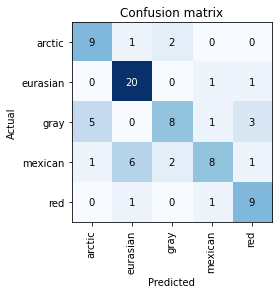

In [55]:
interp.plot_confusion_matrix()
# Question 8: interp object 는 학습된 신경망의 분류 능력을 해석/평가하는데
# 사용되는 오브젝트이다. plot_confusion_matrix() 메소드는 분류능력을 해석하는데 도움을 
# 주는 데이타이다. 이 표에 의하면 학습된 신경망의 이미지 분류 성능에 대해서 어떤 평가를 할 수 있는지
# 최대한 상세히 기술하라. ( 이 표도 예시이며 각자가 5개의 카테고리를 
# 분류하는 신경망을 구축하는 경우 다른 표가 나올 것이다)  

# Confusion Matrix를 참고하면 모델 성능의 지표를 평가할수 있다. eurasian class가 predicted 와 actual 지표를 확인하면 True Positive임을 알 수 있다.